In [200]:
# Connect notebook to Anvil
get_ipython().system('pip install anvil-uplink')
import anvil.server
anvil.server.connect("server_HQ5GYAHEUQ2DX73AXV4TJBNL-UUKRZKOM6GICOE2E")

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [201]:
# Load the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
get_ipython().system('{sys.executable} -m pip install xgboost')
import xgboost
get_ipython().system('pip install lightgbm')
import lightgbm as lgb
import random
import io
from io import StringIO
import sys

from scipy.sparse import hstack, vstack 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import sys, argparse
from scipy import sparse
from sklearn import linear_model
from collections import Counter
from collections import Counter, defaultdict
import operator
import csv
from sklearn.metrics import plot_confusion_matrix
from pandas import option_context

In [202]:
# Read in the data
url = 'https://drive.google.com/file/d/1PhV4zBVA2GOqkhsLj0l-skqQzJH9QmG6/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path).iloc[:, 1:]
df = df.dropna()

In [203]:
# Define X and y, perform the train test split
X = df.iloc[:, 0:71]
y = df[['position']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model 1: XGBoost Classifier

In [204]:
model_skill_to_pos = xgboost.XGBClassifier(n_estimators=100, 
                              max_depth=10,
                              learning_rate=0.1,
                              random_state=0, 
                              objective='multi:softproba')
model_skill_to_pos.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=10, objective='multi:softprob')

In [205]:
pos_prediction = model_skill_to_pos.predict(x_test)
print(pos_prediction)

[4 1 1 ... 1 1 0]


In [206]:
accuracy_score(y_test, pos_prediction)

0.9808350444900753

In [207]:
pos_to_skill = df.groupby('position').sum()
pos_to_skill = pos_to_skill.reset_index()
pos_to_skill

,position,python,java,c/c++,ruby,.net,c#,sql,nosql,typescript,...,storyboard,process flow,wireframe,mockup,prototype,probability and statistics,nlp (natural language processing),machine learning toolkit (sklearn/pytorch),data analysis toolkit (numpy/pandas/scipy),"ui designing tools (figma, balsamiq)"
0,0,515,447,199,90,2,257,58,49,66,...,0,0,0,0,0,0,0,0,0,0
1,1,950,92,0,0,0,0,778,178,0,...,0,0,0,0,0,20,10,20,10,0
2,2,10,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,49,69,0,0,56,88,357,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,15,0,0,0,0,0,0,0,10,...,129,2,123,64,209,0,0,0,0,10


In [208]:
new_sw_course_dict = {'CS 61B: DATA STRUCTURES': 1607, 'CS 61A: THE STRUCTURE AND INTERPRETATION OF COMPUTER PROGRAMS': 1366, 'CS 162: OPERATING SYSTEMS AND SYSTEM PROGRAMMING': 1259, 'CS 170: EFFICIENT ALGORITHMS AND INTRACTABLE PROBLEMS': 1170, 'CS 186: INTRODUCTION TO DATABASE SYSTEMS': 875, 'CS 168: INTRODUCTION TO THE INTERNET: ARCHITECTURE AND PROTOCOLS': 828, 'CS 169: SOFTWARE ENGINEERING': 737, 'DATA 100: PRINCIPLES AND TECHNIQUES OF DATA SCIENCE': 728, 'CS 164: PROGRAMMING LANGUAGES AND COMPILERS': 495, 'CS 188: INTRODUCTION TO ARTIFICIAL INTELLIGENCE': 495, 'CS 160: USER INTERFACE DESIGN AND DEVELOPMENT': 451, 'CS 161: COMPUTER SECURITY': 352, 'CS 184: FOUNDATIONS OF COMPUTER GRAPHICS': 233, 'CS 189: INTRODUCTION TO MACHINE LEARNING': 233, 'DATA 102: DATA INFERENCE AND DECISIONS': 233, 'CS 70: DISCRETE MATHEMATICS AND PROBABILITY THEORY': 100, 'STAT 134: CONCEPTS OF PROBABILITY': 94, 'CS 152: COMPUTER ARCHITECTURE AND ENGINEERING': 0, 'DATA C104: HUMAN CONTEXTS AND ETHICS OF DATA': 0, 'DATA 8: FOUNDATIONS OF DATA SCIENCE': 0, 'STAT 135: CONCEPTS OF STATISTICS': 0, 'STAT 153: INTRODUCTION TO TIME SERIES': 0, 'STAT 154: MODERN STATISTICAL PREDICTION AND MACHINE LEARNING': 0}
new_ds_course_dict = {'DATA 100: PRINCIPLES AND TECHNIQUES OF DATA SCIENCE': 2789, 'CS 61A: THE STRUCTURE AND INTERPRETATION OF COMPUTER PROGRAMS': 2270, 'DATA 8: FOUNDATIONS OF DATA SCIENCE': 1973, 'CS 189: INTRODUCTION TO MACHINE LEARNING': 1560, 'DATA 102: DATA INFERENCE AND DECISIONS': 1288, 'CS 188: INTRODUCTION TO ARTIFICIAL INTELLIGENCE': 833, 'STAT 134: CONCEPTS OF PROBABILITY': 832, 'STAT 135: CONCEPTS OF STATISTICS': 832, 'DATA C104: HUMAN CONTEXTS AND ETHICS OF DATA': 810, 'STAT 154: MODERN STATISTICAL PREDICTION AND MACHINE LEARNING': 763, 'CS 161: COMPUTER SECURITY': 748, 'CS 186: INTRODUCTION TO DATABASE SYSTEMS': 748, 'CS 61B: DATA STRUCTURES': 549, 'CS 170: EFFICIENT ALGORITHMS AND INTRACTABLE PROBLEMS': 458, 'CS 162: OPERATING SYSTEMS AND SYSTEM PROGRAMMING': 455, 'CS 168: INTRODUCTION TO THE INTERNET: ARCHITECTURE AND PROTOCOLS': 455, 'CS 184: FOUNDATIONS OF COMPUTER GRAPHICS': 455, 'CS 152: COMPUTER ARCHITECTURE AND ENGINEERING': 0, 'CS 160: USER INTERFACE DESIGN AND DEVELOPMENT': 0, 'CS 164: PROGRAMMING LANGUAGES AND COMPILERS': 0, 'CS 169: SOFTWARE ENGINEERING': 0, 'CS 70: DISCRETE MATHEMATICS AND PROBABILITY THEORY': 0, 'STAT 153: INTRODUCTION TO TIME SERIES': 0}
new_pm_course_dict = {'CS 162: OPERATING SYSTEMS AND SYSTEM PROGRAMMING': 231, 'CS 61A: THE STRUCTURE AND INTERPRETATION OF COMPUTER PROGRAMS': 54, 'CS 161: COMPUTER SECURITY': 30, 'CS 186: INTRODUCTION TO DATABASE SYSTEMS': 30, 'DATA 100: PRINCIPLES AND TECHNIQUES OF DATA SCIENCE': 22, 'DATA 8: FOUNDATIONS OF DATA SCIENCE': 22, 'CS 169: SOFTWARE ENGINEERING': 14, 'CS 61B: DATA STRUCTURES': 14, 'CS 164: PROGRAMMING LANGUAGES AND COMPILERS': 10, 'CS 168: INTRODUCTION TO THE INTERNET: ARCHITECTURE AND PROTOCOLS': 10, 'CS 188: INTRODUCTION TO ARTIFICIAL INTELLIGENCE': 10, 'CS 152: COMPUTER ARCHITECTURE AND ENGINEERING': 0, 'CS 160: USER INTERFACE DESIGN AND DEVELOPMENT': 0, 'CS 170: EFFICIENT ALGORITHMS AND INTRACTABLE PROBLEMS': 0, 'CS 184: FOUNDATIONS OF COMPUTER GRAPHICS': 0, 'CS 189: INTRODUCTION TO MACHINE LEARNING': 0, 'CS 70: DISCRETE MATHEMATICS AND PROBABILITY THEORY': 0, 'DATA 102: DATA INFERENCE AND DECISIONS': 0, 'DATA C104: HUMAN CONTEXTS AND ETHICS OF DATA': 0, 'STAT 134: CONCEPTS OF PROBABILITY': 0, 'STAT 135: CONCEPTS OF STATISTICS': 0, 'STAT 153: INTRODUCTION TO TIME SERIES': 0, 'STAT 154: MODERN STATISTICAL PREDICTION AND MACHINE LEARNING': 0}
new_qa_course_dict = {'CS 161: COMPUTER SECURITY': 564, 'CS 186: INTRODUCTION TO DATABASE SYSTEMS': 426, 'CS 61A: THE STRUCTURE AND INTERPRETATION OF COMPUTER PROGRAMS': 411, 'CS 162: OPERATING SYSTEMS AND SYSTEM PROGRAMMING': 180, 'CS 160: USER INTERFACE DESIGN AND DEVELOPMENT': 126, 'CS 169: SOFTWARE ENGINEERING': 74, 'CS 170: EFFICIENT ALGORITHMS AND INTRACTABLE PROBLEMS': 74, 'CS 61B: DATA STRUCTURES': 74, 'CS 168: INTRODUCTION TO THE INTERNET: ARCHITECTURE AND PROTOCOLS': 54, 'DATA 100: PRINCIPLES AND TECHNIQUES OF DATA SCIENCE': 54, 'CS 164: PROGRAMMING LANGUAGES AND COMPILERS': 49, 'CS 188: INTRODUCTION TO ARTIFICIAL INTELLIGENCE': 49, 'DATA 8: FOUNDATIONS OF DATA SCIENCE': 49, 'STAT 134: CONCEPTS OF PROBABILITY': 46, 'CS 184: FOUNDATIONS OF COMPUTER GRAPHICS': 33, 'CS 189: INTRODUCTION TO MACHINE LEARNING': 5, 'DATA 102: DATA INFERENCE AND DECISIONS': 5, 'CS 152: COMPUTER ARCHITECTURE AND ENGINEERING': 0, 'CS 70: DISCRETE MATHEMATICS AND PROBABILITY THEORY': 0, 'DATA C104: HUMAN CONTEXTS AND ETHICS OF DATA': 0, 'STAT 135: CONCEPTS OF STATISTICS': 0, 'STAT 153: INTRODUCTION TO TIME SERIES': 0, 'STAT 154: MODERN STATISTICAL PREDICTION AND MACHINE LEARNING': 0}
new_ui_course_dict = {'CS 160: USER INTERFACE DESIGN AND DEVELOPMENT': 458, 'CS 164: PROGRAMMING LANGUAGES AND COMPILERS': 440, 'CS 168: INTRODUCTION TO THE INTERNET: ARCHITECTURE AND PROTOCOLS': 440, 'CS 188: INTRODUCTION TO ARTIFICIAL INTELLIGENCE': 440, 'CS 152: COMPUTER ARCHITECTURE AND ENGINEERING': 425, 'CS 169: SOFTWARE ENGINEERING': 425, 'CS 170: EFFICIENT ALGORITHMS AND INTRACTABLE PROBLEMS': 425, 'DATA 102: DATA INFERENCE AND DECISIONS': 425, 'CS 161: COMPUTER SECURITY': 150, 'CS 162: OPERATING SYSTEMS AND SYSTEM PROGRAMMING': 61, 'STAT 134: CONCEPTS OF PROBABILITY': 17, 'CS 184: FOUNDATIONS OF COMPUTER GRAPHICS': 15, 'CS 61A: THE STRUCTURE AND INTERPRETATION OF COMPUTER PROGRAMS': 15, 'DATA 100: PRINCIPLES AND TECHNIQUES OF DATA SCIENCE': 15, 'DATA 8: FOUNDATIONS OF DATA SCIENCE': 15, 'CS 61B: DATA STRUCTURES': 1, 'CS 186: INTRODUCTION TO DATABASE SYSTEMS': 0, 'CS 189: INTRODUCTION TO MACHINE LEARNING': 0, 'CS 70: DISCRETE MATHEMATICS AND PROBABILITY THEORY': 0, 'DATA C104: HUMAN CONTEXTS AND ETHICS OF DATA': 0, 'STAT 135: CONCEPTS OF STATISTICS': 0, 'STAT 153: INTRODUCTION TO TIME SERIES': 0, 'STAT 154: MODERN STATISTICAL PREDICTION AND MACHINE LEARNING': 0}

In [209]:
courses_list = [0, new_sw_course_dict, new_ds_course_dict, new_pm_course_dict, new_qa_course_dict, new_ui_course_dict]

# Model 2: XGBoost Random Forest Classifier

In [210]:
parameter_2 = {'n_estimators':100,'max_depth':20,'learning_rate':0.1,'random_state':0,'objective':'multi:softproba'}
rfmodel = xgboost.XGBRFClassifier(**parameter_2)
rfmodel.fit(x_train,y_train)
prediction_2 = rfmodel.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [211]:
print(prediction_2)
print("ROC AUC SCORE:", accuracy_score(y_test, prediction_2))

[4 1 1 ... 1 1 0]
ROC AUC SCORE: 0.9801505817932923


# Model 3: Light GBM model

In [212]:
parameter_3 = {'n_estimators':100,'max_depth':30,'learning_rate':0.09,'random_state':0,'objective':'multi:softproba'}
lgbmodel = lgb.LGBMClassifier(**parameter_3)
lgbmodel.fit(x_train,y_train)
prediction_3 = lgbmodel.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
print(prediction_3)
print("ROC AUC SCORE:", accuracy_score(y_test, prediction_3))

[4 1 1 ... 1 1 0]
ROC AUC SCORE: 0.9822039698836413


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


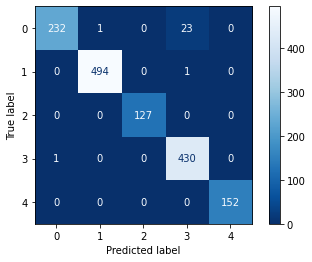

In [214]:
plot_confusion_matrix(lgbmodel,x_test,y_test,cmap='Blues_r')

# Model Ensemble

In [215]:
# get the predict_proba of model 1
part1=model_skill_to_pos.predict_proba(x_test)
df1 = pd.DataFrame(part1, columns = ['XGBC_1','XGBC_2','XGBC_3','XGBC_4','XGBC_5'])
df1.shape

(1461, 5)

In [216]:
# get the predict_proba of model 2
part2=rfmodel.predict_proba(x_test)
df2 = pd.DataFrame(part2, columns = ['XGBRF_1','XGBRF_2','XGBRF_3','XGBRF_4','XGBRF_5'])
df2.shape

(1461, 5)

In [217]:
# get the predict_proba of model 3
part3=lgbmodel.predict_proba(x_test)
df3 = pd.DataFrame(part3, columns = ['LGBC_1','LGBC_2','LGBC_3','LGBC_4','LGBC_5'])
df3.shape

(1461, 5)

In [218]:
nested_nested_list = [[[1,2,3],[4,5,6],[3,4,5]],[[5,6,7],[6,7,8],[8,9,10]]]
d = pd.DataFrame([[1,2,3,4,5],[4,5,6,7,8],[3,4,5,6,7]])
d.mean().to_frame().T

,0,1,2,3,4
0,2.666667,3.666667,4.666667,5.666667,6.666667


In [219]:
# combine those for all three models into one big dataset
allmodels = [model_skill_to_pos,rfmodel,lgbmodel]
temp = []
for i in random.sample(allmodels,2):
  temp.append(i.predict_proba(x_test))
print(temp)

[array([[0.1866392 , 0.18658358, 0.18644725, 0.18657511, 0.25375485],
       [0.18958162, 0.25291544, 0.18562587, 0.18627447, 0.18560262],
       [0.18655585, 0.2542157 , 0.1863936 , 0.18646458, 0.18637027],
       ...,
       [0.18678916, 0.25387582, 0.18625385, 0.18685067, 0.18623053],
       [0.18663745, 0.25392056, 0.18646477, 0.18653578, 0.18644144],
       [0.25350317, 0.18686636, 0.18652624, 0.1866013 , 0.1865029 ]],
      dtype=float32), array([[5.11912222e-04, 1.24611484e-04, 1.05657607e-04, 6.24499458e-04,
        9.98633325e-01],
       [1.99816329e-03, 9.95658994e-01, 1.63373159e-04, 2.11101328e-03,
        6.85362393e-05],
       [1.38874311e-04, 9.99572456e-01, 8.35259998e-05, 1.62162309e-04,
        4.29561551e-05],
       ...,
       [6.90824236e-04, 9.98337626e-01, 1.02723920e-04, 8.25690222e-04,
        4.30934379e-05],
       [1.83950237e-04, 9.99433696e-01, 1.10636916e-04, 2.14797052e-04,
        5.68988871e-05],
       [9.99204457e-01, 2.91548524e-04, 1.43330617e-0

In [220]:
# build an ensemble choosing mechanism
# labels are the true labels
def ensemble_random(modellist, input,  n_models):
  allensemble = []
  allauc = []
  allresult = []
  for i in range(5):
    ensemble = []
    temp = []
    result = []
    for model in random.sample(allmodels, n_models):
      old_stdout = sys.stdout
      new_stdout = io.StringIO()
      sys.stdout = new_stdout
      print(model)
      output = new_stdout.getvalue()
      sys.stdout = old_stdout
      ensemble.append(output)
      temp.append(model.predict_proba(input))
    for row in range(len(input)):
      a = []
      for i in range(n_models):
        a.append(temp[i][row])
      dftemp = pd.DataFrame(a)
      avgprob_list = dftemp.mean().values.tolist()
      maxprob = max(avgprob_list)
      result.append(avgprob_list.index(maxprob)+1)
    auc = accuracy_score(y_test, result)
    allensemble.append(ensemble)
    allauc.append(auc)
    allresult.append(result)
  
  final = pd.DataFrame({'ensemble': allensemble, 'auc': allauc, 'result': allresult},).sort_values(by='auc', ascending=False)
  pd.set_option('display.max_colwidth', None)
  return final

In [221]:
randomized = ensemble_random(allmodels, x_test, n_models=2)
randomized

,ensemble,auc,result
0,"[XGBRFClassifier(learning_rate=0.1, max_depth=20, objective='multi:softprob')\n, XGBClassifier(max_depth=10, objective='multi:softprob')\n]",0.0,"[5, 2, 2, 2, 4, 3, 4, 2, 2, 1, 2, 2, 3, 2, 2, 1, 4, 5, 3, 2, 1, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 3, 5, 4, 4, 1, 1, 2, 4, 1, 4, 2, 2, 3, 4, 2, 2, 5, 5, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 2, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 4, 4, 4, 1, 2, 2, 4, 2, 3, 4, 3, 2, 4, 5, 3, 2, 4, 2, 4, 5, 2, 2, ...]"
1,"[XGBRFClassifier(learning_rate=0.1, max_depth=20, objective='multi:softprob')\n, LGBMClassifier(learning_rate=0.09, max_depth=30, objective='multi:softproba',\n random_state=0)\n]",0.0,"[5, 2, 2, 2, 4, 3, 4, 2, 2, 1, 2, 2, 3, 2, 2, 1, 4, 5, 3, 2, 1, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 3, 5, 4, 4, 1, 1, 2, 4, 1, 4, 2, 2, 3, 4, 2, 2, 5, 5, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 2, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 4, 4, 4, 1, 2, 2, 4, 2, 3, 4, 3, 2, 4, 5, 3, 2, 4, 2, 4, 5, 2, 2, ...]"
2,"[XGBRFClassifier(learning_rate=0.1, max_depth=20, objective='multi:softprob')\n, LGBMClassifier(learning_rate=0.09, max_depth=30, objective='multi:softproba',\n random_state=0)\n]",0.0,"[5, 2, 2, 2, 4, 3, 4, 2, 2, 1, 2, 2, 3, 2, 2, 1, 4, 5, 3, 2, 1, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 3, 5, 4, 4, 1, 1, 2, 4, 1, 4, 2, 2, 3, 4, 2, 2, 5, 5, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 2, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 4, 4, 4, 1, 2, 2, 4, 2, 3, 4, 3, 2, 4, 5, 3, 2, 4, 2, 4, 5, 2, 2, ...]"
3,"[XGBRFClassifier(learning_rate=0.1, max_depth=20, objective='multi:softprob')\n, LGBMClassifier(learning_rate=0.09, max_depth=30, objective='multi:softproba',\n random_state=0)\n]",0.0,"[5, 2, 2, 2, 4, 3, 4, 2, 2, 1, 2, 2, 3, 2, 2, 1, 4, 5, 3, 2, 1, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 3, 5, 4, 4, 1, 1, 2, 4, 1, 4, 2, 2, 3, 4, 2, 2, 5, 5, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 2, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 4, 4, 4, 1, 2, 2, 4, 2, 3, 4, 3, 2, 4, 5, 3, 2, 4, 2, 4, 5, 2, 2, ...]"
4,"[XGBClassifier(max_depth=10, objective='multi:softprob')\n, LGBMClassifier(learning_rate=0.09, max_depth=30, objective='multi:softproba',\n random_state=0)\n]",0.0,"[5, 2, 2, 2, 4, 3, 4, 2, 2, 1, 2, 2, 3, 2, 2, 1, 4, 5, 3, 2, 1, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 3, 5, 4, 4, 1, 1, 2, 4, 1, 4, 2, 2, 3, 4, 2, 2, 5, 5, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 2, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 4, 4, 4, 1, 2, 2, 4, 2, 3, 4, 3, 2, 4, 5, 3, 2, 4, 2, 4, 5, 2, 2, ...]"


In [222]:
# use the choose ensamble to generate final prediction
best = randomized.iloc[0]
best_model = best.iloc[:1]
best_auc = best.iloc[1:2]
best_prediction = best.iloc[2:3].tolist()
while isinstance(best_prediction[0], list):
    best_prediction = best_prediction[0]
print(best_prediction)

[5, 2, 2, 2, 4, 3, 4, 2, 2, 1, 2, 2, 3, 2, 2, 1, 4, 5, 3, 2, 1, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 3, 5, 4, 4, 1, 1, 2, 4, 1, 4, 2, 2, 3, 4, 2, 2, 5, 5, 4, 4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 2, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 1, 3, 4, 4, 4, 1, 2, 2, 4, 2, 3, 4, 3, 2, 4, 5, 3, 2, 4, 2, 4, 5, 2, 2, 4, 1, 5, 2, 4, 4, 4, 1, 3, 3, 4, 3, 5, 2, 4, 4, 1, 5, 1, 1, 1, 2, 4, 4, 4, 4, 3, 2, 4, 5, 2, 3, 4, 4, 3, 1, 4, 1, 2, 2, 2, 4, 1, 2, 4, 4, 4, 2, 2, 5, 1, 2, 4, 2, 2, 4, 4, 2, 3, 4, 2, 2, 2, 5, 2, 4, 2, 2, 5, 2, 4, 4, 2, 1, 2, 2, 5, 3, 2, 2, 3, 2, 3, 1, 2, 4, 1, 2, 5, 4, 3, 1, 3, 4, 3, 1, 2, 4, 2, 4, 1, 2, 4, 4, 5, 5, 5, 1, 1, 2, 2, 2, 1, 2, 1, 4, 4, 4, 2, 1, 5, 1, 5, 4, 2, 4, 5, 4, 4, 3, 2, 1, 4, 1, 2, 4, 4, 4, 3, 1, 4, 1, 2, 4, 2, 4, 4, 2, 2, 5, 2, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4, 2, 2, 2, 3, 4, 2, 5, 4, 2, 1, 2, 3, 2, 4, 4, 2, 3, 4, 4, 4, 2, 2, 5, 5, 4, 4, 4, 2, 4, 2, 4, 1, 4, 1, 4, 5, 4, 4, 2, 4, 2, 1, 2, 1, 5, 2, 4, 2, 2, 1, 1, 1, 3, 4, 4, 4, 3, 2, 4, 4, 4, 2, 5, 4, 3, 2, 2, 1, 4, 4, 2, 1, 

In [ ]:
@anvil.server.callable
def predict1(skills):

  # place the dataset in a dataframe
  x = pd.DataFrame([skills],columns=x_train.columns)

  # predict position based on skills
  temp = []
  for model in [rfmodel,lgbmodel]:
    temp.append(model.predict_proba(x))
  for row in range(len(x)):
      a = []
      for i in range(2):
        a.append(temp[i][row])
      dftemp = pd.DataFrame(a)
      avgprob_list = dftemp.mean().values.tolist()
  maxprob = max(avgprob_list)
  best_prediction = avgprob_list.index(maxprob)+1
  position_dict = {1: 'Software Engineer', 2: 'Data Scientist', 3: 'Product Manager', 4: 'QA/Test Engineer', 5: 'UI/UX Designer'}
  position = position_dict.get(best_prediction)

  # predict top skills for that position
  new = pos_to_skill[pos_to_skill['position'] == best_prediction]
  new = new.iloc[:, 1:]
  topSkills = new.iloc[0].sort_values(ascending=False)[:6].to_dict()

  # predict top courses for that position
  position_courses_dict = courses_list[best_prediction]
  new2 = pd.DataFrame(position_courses_dict, index=[0])
  tc = new2.iloc[0].sort_values(ascending=False)[:6].to_dict()
  topCourses=dict()
  for key in tc:
    code=key.split(':')[0].upper()
    topCourses[code]=tc[key]

  return position, topSkills, topCourses



@anvil.server.callable
def predict2(job):
  map={'software engineer':1,'data scientist':2,'product manager':3,'qa testing':4, 'ux designer':5}
  job=map.get(job)
  # predict top skills for that position
  new = pos_to_skill[pos_to_skill['position'] == job-1]
  new = new.iloc[:, 1:]
  topSkills = new.iloc[0].sort_values(ascending=False)[:6].to_dict()
  print(topSkills)

  # predict top courses for that position
  position_courses_dict = courses_list[job]
  new2 = pd.DataFrame([position_courses_dict])
  tc = new2.iloc[0].sort_values(ascending=False)[:6].to_dict()
  topCourses=dict()
  for key in tc:
    code=key.split(':')[0].upper()
    topCourses[code]=tc[key]
  return topSkills,topCourses


anvil.server.wait_forever()

{'automated testing': 371, 'sql': 357, 'selenium': 172, 'javascript': 106, 'css': 102, 'html': 101}
{'product management': 324, 'marketing': 293, 'roadmap': 287, 'communication': 217, 'product development': 150, 'prioritize': 137}
{'python': 950, 'machine learning': 810, 'sql': 778, 'statistics': 763, 'r': 702, 'algorithm': 455}
{'automated testing': 371, 'sql': 357, 'selenium': 172, 'javascript': 106, 'css': 102, 'html': 101}
{'python': 950, 'machine learning': 810, 'sql': 778, 'statistics': 763, 'r': 702, 'algorithm': 455}
{'python': 515, 'java': 447, 'c#': 257, 'algorithm': 233, 'javascript': 209, 'c/c++': 199}
{'python': 950, 'machine learning': 810, 'sql': 778, 'statistics': 763, 'r': 702, 'algorithm': 455}
{'automated testing': 371, 'sql': 357, 'selenium': 172, 'javascript': 106, 'css': 102, 'html': 101}


In [ ]:
test1=[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
predict1(test1)

In [ ]:
test2='software engineer'
predict2('software engineer')